*** Recall the built-in InsectSprays data frame, containing counts of insects on various agricultural units treated with one of six sprays.***


*** a. Produce a histogram of the counts of insects using base R graphics. ***

In [1]:
InsectSprays[1:5,]

count,spray
10,A
7,A
20,A
14,A
14,A


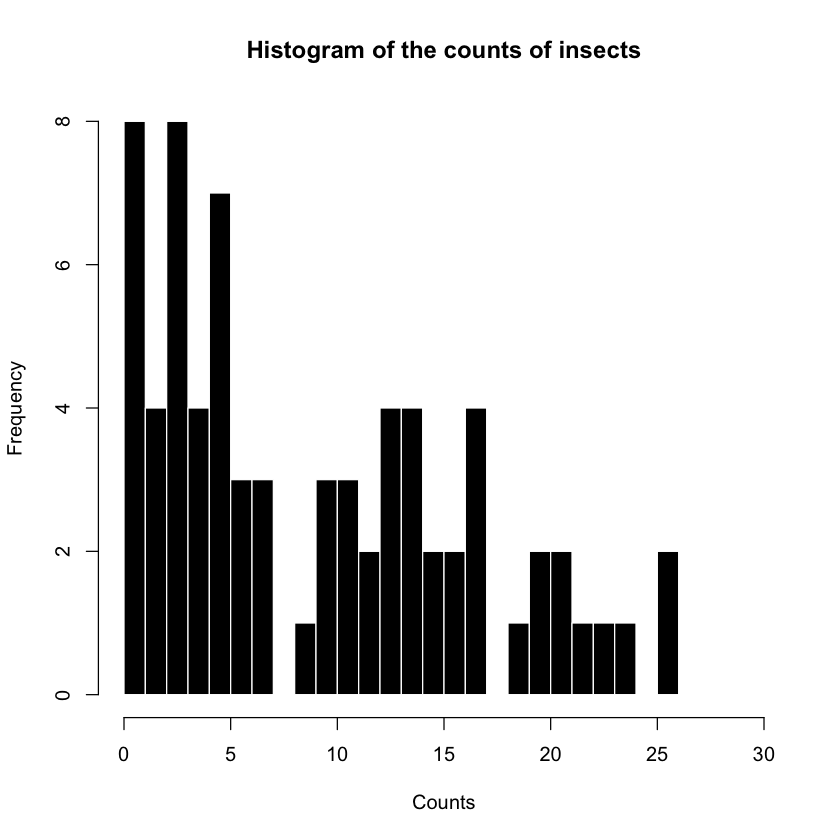

In [19]:
hist(InsectSprays$count, main = "Histogram of the counts of insects", xlab = "Counts", breaks = seq(0,30,1)
            ,border ="white", col = "black")


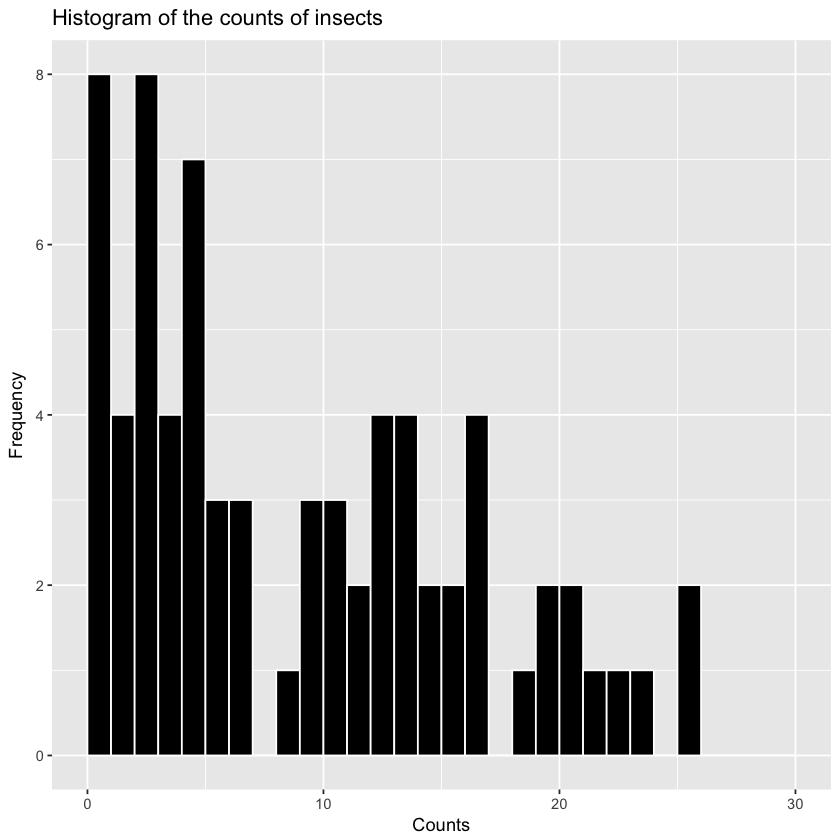

In [17]:
library(ggplot2)
qplot(InsectSprays$count, geom = "blank", main = "Histogram of the counts of insects", 
           xlab = "Counts", ylab = "Frequency") + geom_histogram(color="white", fill = "black",
                                                            breaks = seq(0,30,1), closed = "right")

***b. Obtain the total number of insects found according to each spray (this was also asked in Exercise 13.2 (f) on page 273). Then, use base R graphics to produce a vertical barplot and a pie chart of these totals, labeling each plot appropriately***

A   B   C   D   E   F 
174 184  25  59  42 200

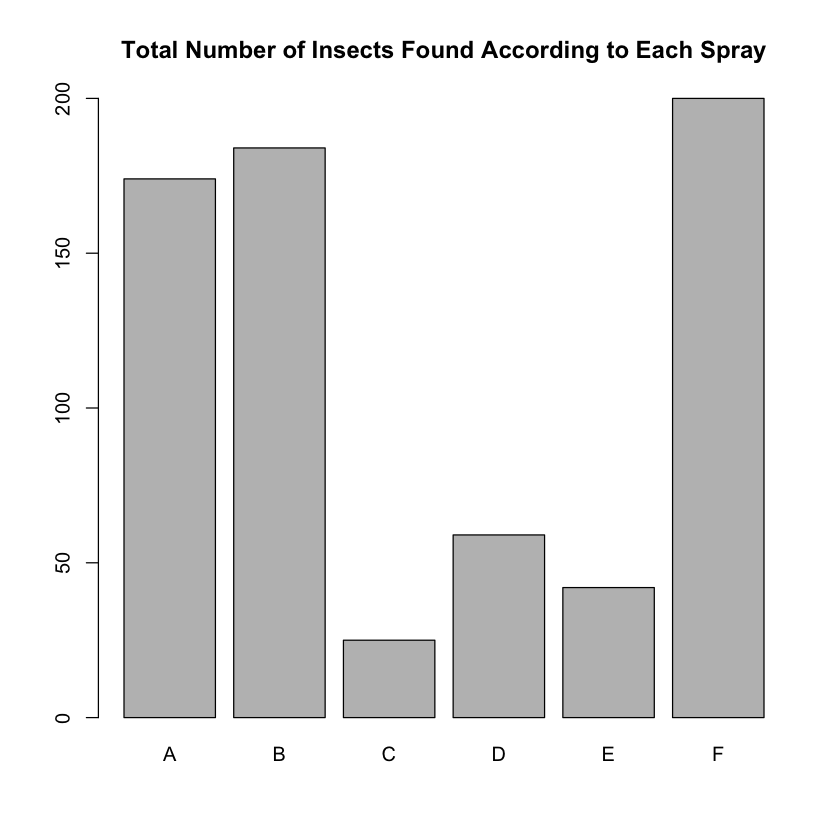

In [55]:
mylist <- tapply(InsectSprays$count, INDEX = InsectSprays$spray, FUN = sum)
mylist
barplot(mylist, beside = FALSE, horiz = FALSE, main = "Total Number of Insects Found According to Each Spray", 
        ylim = c(0,200))

A   B   C   D   E   F 
174 184  25  59  42 200

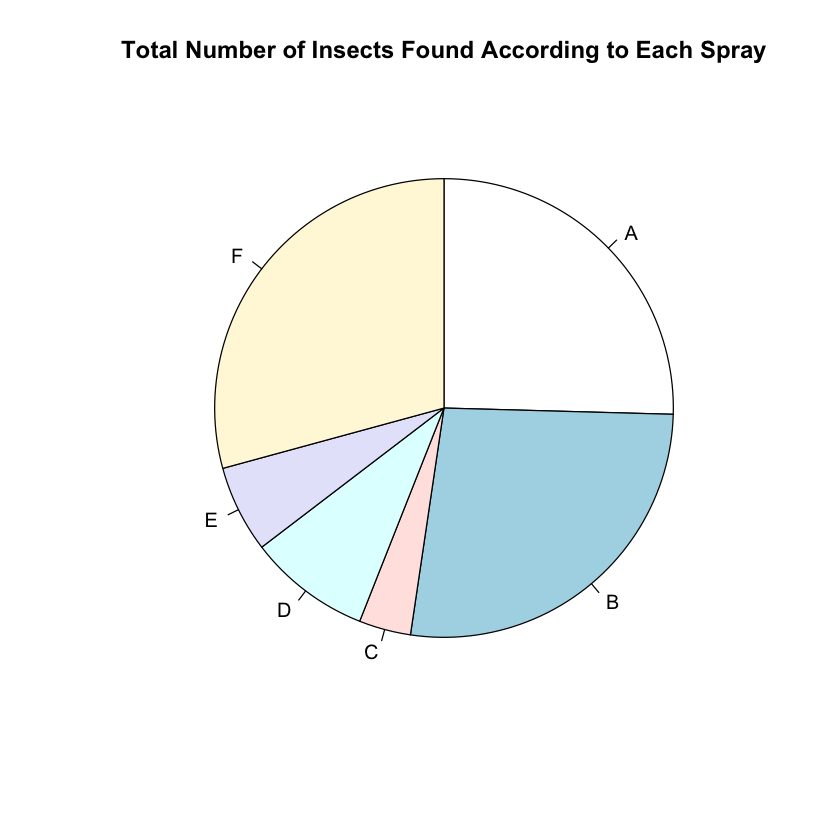

In [70]:
mylist <- tapply(InsectSprays$count, INDEX = InsectSprays$spray, FUN = sum)
mylist
pie(mylist,  main = "Total Number of Insects Found According to Each Spray" ,
         labels = c("A", "B", "C", "D", "E", "F"), clockwise = TRUE) 

*** c. Use ggplot2 functionality to generate side-by-side boxplots of the counts of insects according to each spray type and include appropriate axis labels and a title. ***

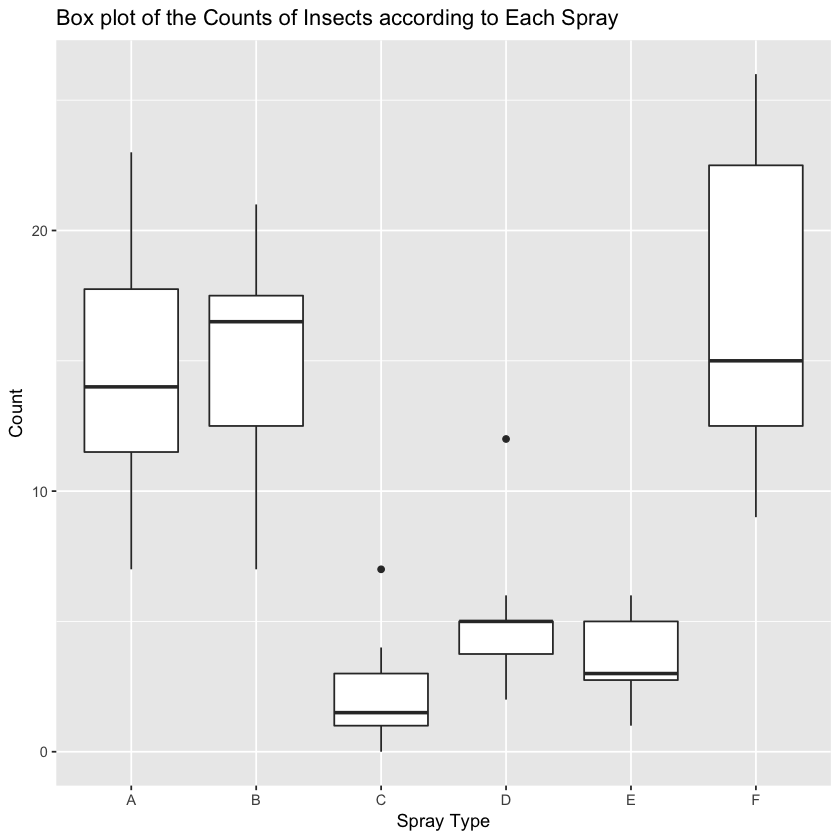

In [96]:
sprays.factor <- factor(InsectSprays$spray)
library("ggplot2")
qplot(sprays.factor , InsectSprays$count, geom = "boxplot", 
        main = "Box plot of the Counts of Insects according to Each Spray", xlab = "Spray Type", ylab = "Count")


*** Yet another of R’s useful ready-to-use data sets is USArrests, containing data on the number of arrests for murder, rape, and assault per 100,000 individuals in each of the 50 states of the United States, recorded in 1973 (see, for example, McNeil, 1977). It also includes a variable giving the percentage of urban-based population in each
state. Briefly inspect the data frame object and the accompanying documentation ?USArrests. Then complete the following: ***


*** d. Use ggplot2 functionality to generate a right-exclusive histogram of the proportion of urban population for the states. Set your breaks to be 10 units each, between 0 and 100. Have the histogram show the first quartile, the median, and the third quartile; then provide a matching legend. Use colors as you like and include appropriate axis annotation. ***

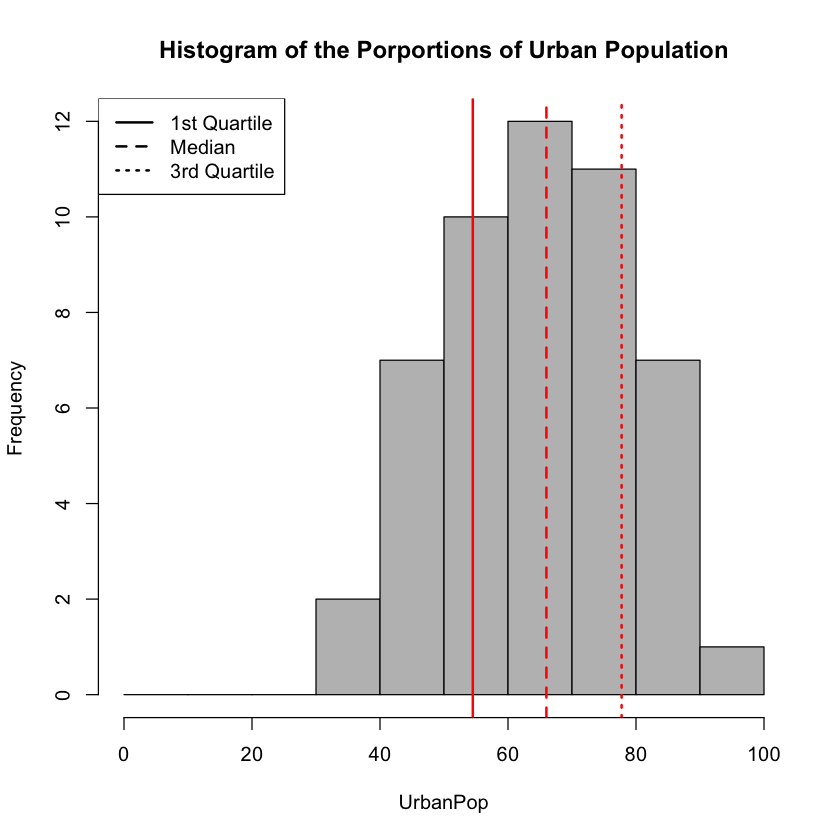

In [2]:
hist(USArrests$UrbanPop,breaks=seq(0,100,10),col="gray",main="Histogram of the Porportions of Urban Population",
                                     xlab="UrbanPop")
abline(v=c(quantile(USArrests$UrbanPop,prob=0.25),median(USArrests$UrbanPop),quantile(USArrests$UrbanPop,prob=0.75)),
                                     lty=c(1,2,3),lwd=2, col = 'red')
legend("topleft",legend=c("1st Quartile","Median", "3rd Quartile"),lty=c(1,2,3),lwd=2)

*** e. The code t(as.matrix(USArrests[,-3])) creates a matrix of the USArrests data without the urban population column, and the built-in R object state.abb provides the two-letter state abbreviations, in alphabetical order, as a character vector. Use these two structures and base R graphics to produce a horizontal, stacked barplot with the horizontal bars labeled with state abbreviations and with each bar split according to the type of crime (murder, rape, and assault). Include a legend. ***

In [31]:
mylist <- t(as.matrix(USArrests[,-3]))
mylist

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,⋯,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Murder,13.2,10.0,8.1,8.8,9.0,7.9,3.3,5.9,15.4,17.4,⋯,3.8,13.2,12.7,3.2,2.2,8.5,4.0,5.7,2.6,6.8
Assault,236.0,263.0,294.0,190.0,276.0,204.0,110.0,238.0,335.0,211.0,⋯,86.0,188.0,201.0,120.0,48.0,156.0,145.0,81.0,53.0,161.0
Rape,21.2,44.5,31.0,19.5,40.6,38.7,11.1,15.8,31.9,25.8,⋯,12.8,26.9,25.5,22.9,11.2,20.7,26.2,9.3,10.8,15.6


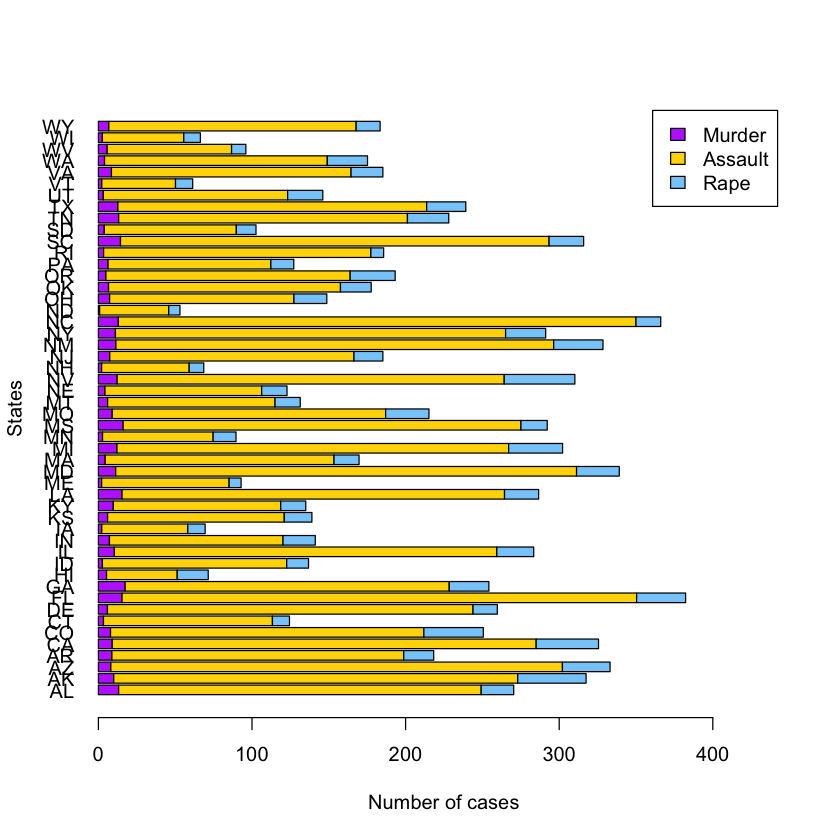

In [32]:
barplot(mylist, beside = FALSE, horiz = TRUE, las=1, names.arg = state.abb,
        ,col = c("darkorchid1", "gold", "lightskyblue"), xlab = "Number of cases", ylab = "States", xlim = c(0,450)
        , legend.text = c("Murder", "Assault", "Rape"), args.legend = list("topright"))

***f. Define a new factor vector urbancat that is set to 1 if the corresponding state has an urban population percentage greater than the median percentage and is set to 0 otherwis***

In [43]:
med <- median(USArrests$UrbanPop)
urbancat <- cut(x=USArrests$UrbanPop, breaks = c(0,med,max(USArrests$UrbanPop)))
levels(urbancat) <- c(0,1)
urbancat

[1] 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1
[39] 1 0 0 0 1 1 0 0 1 0 0 0
Levels: 0 1

*** g.Create a new copy of USArrests in your workspace, after deleting the UrbanPop column, leaving just the three crime rate variables. Then insert a new, fourth column in this object with urbancat ***

In [44]:
mydata <- cbind(USArrests[-3], urbancat)
mydata

,Murder,Assault,Rape,urbancat
Alabama,13.2,236,21.2,0
Alaska,10.0,263,44.5,0
Arizona,8.1,294,31.0,1
Arkansas,8.8,190,19.5,0
California,9.0,276,40.6,1
Colorado,7.9,204,38.7,1
Connecticut,3.3,110,11.1,1
Delaware,5.9,238,15.8,1
Florida,15.4,335,31.9,1
Georgia,17.4,211,25.8,0


*** h. Use the data frame from (g) to produce a scatterplot matrix and other associated plots of the three crime rates against one another via GGally functionality. Use color to split the crime rates according to the two levels of urbancat. ***

In [ ]:
library("ggplot2")
library("GGally")
ggpairs(mydata,mapping= aes(col=urbancat),axisLabels="internal")

![Image](https://github.com/tamhuynh92/The-Book-of-R-Solutions/blob/master/Chapter%2014/Ex14.1.png?raw=true)

*** Return to the built-in quakes data set.***

***i. Create a factor vector corresponding to the magnitudes. Each entry should assume one of three categories based on breaks marked by the minimum magnitude, the 1/3th quantile, the 2/3th quantile, and the maximum magnitude. ***

In [20]:
mag.vector <- cut(x=quakes$mag, 
                  breaks = c(min(quakes$mag),quantile(quakes$mag, 1/3),quantile(quakes$mag, 2/3),max(quakes$mag)), 
                                           include.lowest = T)
levels(mag.vector) <- c("Low", "Med", "High")



*** j. Re-create the plot shown next, where low-, medium-, and high- magnitude events, according to your factor vector from (i), are plotted with pch being assigned 1, 2, and 3, respectively.***

*** k. Add a legend to the plot from (j) to reference the three pch values. ***

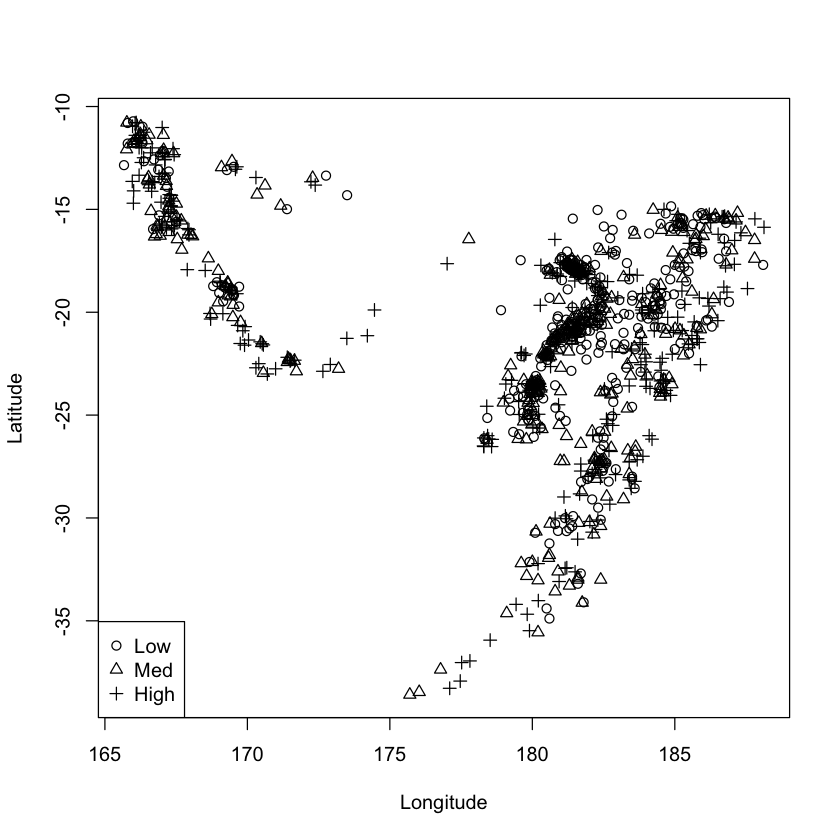

In [26]:
quakes_pch <- rep(3, nrow(quakes))
quakes_pch[mag.vector == "Low"] <- 1
quakes_pch[mag.vector == "Med"] <- 2

plot(quakes$long,quakes$lat, pch = quakes_pch, xlab = "Longitude", ylab = "Latitude")
legend("bottomleft", legend = c("Low","Med", "High"), pch = c(1,2,3))